## Instalacja bibliotek

In [2]:
!python --version

Python 3.11.9


In [1]:
# VS Code + Jupyter Extension

#conda create -n "psio-2023" python=3.11
# A -> Bv2.0.0 | C -> Bv1.5.0
# conda info --envs
# conda activate psio-2023
%pip install numpy scipy matplotlib opencv-python scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------- ----------------------- 5.2/12.9 MB 29.0 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 35.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ----------- ---------------------------- 13.1/44.8 MB 63.3 MB/s eta 0:00:01
   ----------------------- ---------------- 26.2/44.8 MB 66.5 MB/s eta 0:00:01
   ----------------------------------- ---- 39.8/44.8 MB 66.8 MB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 MB 63.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 69.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   -------------- ------------------------- 13.6/38.8 MB 65.9 MB/s eta 0:00:01
   ---------------------------- ----------- 27.8/38.8 MB 67.8 MB/s eta 0:00:01
   ----------

## Sprawdzanie bibliotek

In [6]:
import numpy as np # numpy
import matplotlib.pyplot as plt # matplotlib
import cv2 # opencv-python
import skimage # -> scikit-image
import scipy # scipy

print("numpy version: ", np.__version__)
# print("matplotlib version: ", matplotlib.__version__)
print("opencv-python version: ", cv2.__version__)
print("scikit-image version: ", skimage.__version__)
print("scipy version: ", scipy.__version__)



numpy version:  2.1.1
opencv-python version:  4.10.0
scikit-image version:  0.24.0
scipy version:  1.14.1


## Działania na macierzach

Korzystając z biblioteki numpy przygotuj dowolną macierz o wymiarach MxN.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.457221151684376..4.06380701481587].


(128, 128, 3) float64 -4.457221151684376 4.06380701481587


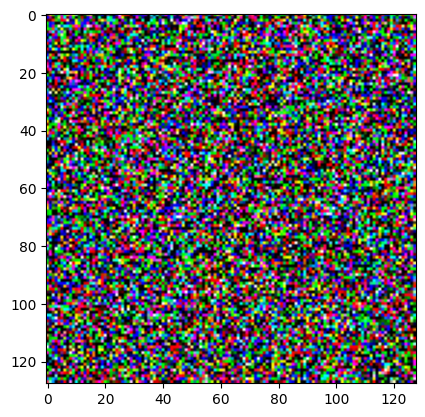

In [7]:
arr = np.ones((64, 64, 3), dtype=np.uint8) 
arr = np.zeros((64, 64, 3), dtype=np.uint8)
arr = np.random.normal(0.0, 1.0, (128, 128, 3)) # 0-1 float32/64
print(arr.shape, arr.dtype, arr.min(), arr.max())

plt.imshow(arr) # arr | 0-1 float32/64 | 0-255 uint8
# plt.matshow(arr)
plt.show()

(256, 256, 3) float32 1.0 1.0


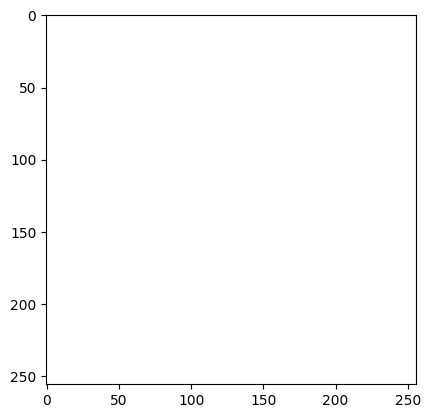

In [28]:
arr = np.full((256, 128, 3), 128, dtype=np.uint8) / 255.0 # 0-255 np.uint8
arr = np.zeros((256, 128, 3)) + 1 # macierz + skalar = macierz
arr = np.zeros((256, 256, 3), dtype=np.float32) + np.ones((256, 256, 3), dtype=np.uint8)
# 0-255 -> 0-1
print(arr.shape, arr.dtype, arr.min(), arr.max())
plt.imshow(arr)
plt.show()

# arr = np.random.normal(0, 1.0, (256, 128, 3))
# arr = np.atleast_3d(arr)

# print(arr.shape)

# plt.imshow(arr)
# plt.show()

## Iterowanie po macierzach numpy

In [8]:
import time 

arr = np.ones((1024, 1024, 3))
h, w, c = arr.shape

start = time.time()
for i in range(h):
    for j in range(w):
        for k in range(c):
            arr[i, j, k] += 1
print("Time: ", time.time() - start)

start = time.time()
arr = arr + 1 # = arr.__add__(1)

# macierz + skalar = macierz
# macierz + macierz = macierz
# M[1024, 1024, 3] + N[1, 1, 3] = M[1024, 1024, 3]

print("Time: ", time.time() - start)

Time:  0.5764989852905273
Time:  0.00749969482421875


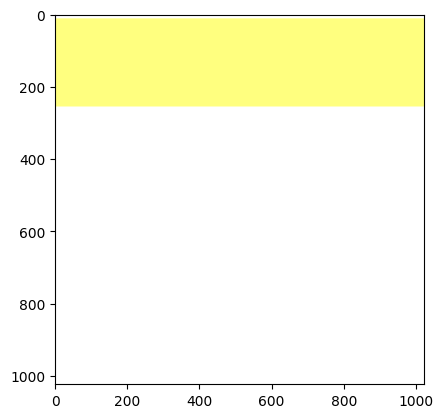

In [11]:
arr = np.ones((1024, 1024, 3))
# arr[256:512, ..., 0] = 0
# arr[..., 1] = 0
# arr[512:768, ...] = 0 # arr[512:768] = 0 -> arr[512:768, :, :] = 0
# arr[:, 768:, 2] = 0
# arr[:128, :, 2] = 0
arr = np.ones((1024, 1024, 3))
arr[0:64, 64:256, 0:2] = 0
arr[:, :, 2] = 0.5
arr[:64, 128:, 1] = 0.25
arr[..., 0:3] = 1
arr[12:256, ..., 2] = 0.5

# R 1.0, G 1.0, B 0.5 -> Yellow

plt.imshow(arr)
plt.show()

## wyczytywanie obrazów

In [3]:
data = list(range(10))
data, data[::-1]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

(512, 512) float32 0.09761177 0.9608667


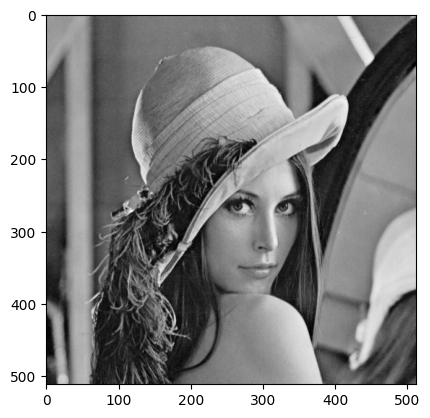

In [14]:
img = (cv2.imread("Lenna.png") /255.0).astype(np.float32)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# img = img[..., ::-1] # img[:, :, ::-1]
print(img.shape, img.dtype, img.min(), img.max())
plt.imshow(img, cmap="gray")
plt.show()

(512, 512) float64 0.07254666666666666 0.9654356862745097


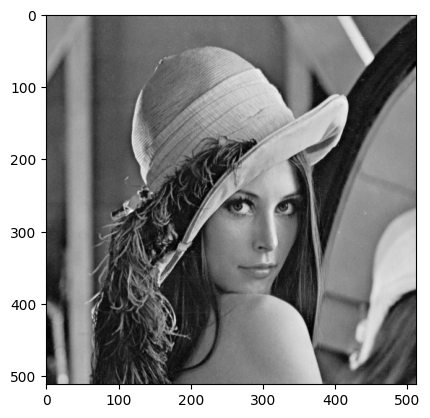

In [15]:
img = skimage.io.imread("Lenna.png")
img = skimage.color.rgb2gray(img)
# img = skimage.color.gray2rgb(img)
print(img.shape, img.dtype, img.min(), img.max())

plt.imshow(img, cmap="gray")
plt.show()

## maska

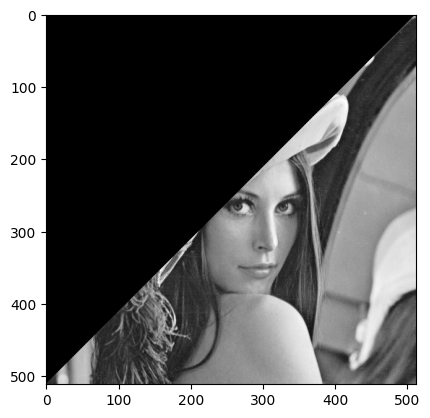

In [16]:
arr = np.ones((1024, 1024, 3))
arr = np.tri(512, 512, 0, dtype=np.float32)
arr = np.rot90(arr)
img2 = img * arr
plt.imshow(img2, cmap="gray")
plt.show()